In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math


we are going to use a sequence length of 4 which means four words , we can give the maximum number of sequence length

The **batch size** is 1 where we are going give one word as a vector

The **input dim** should be 512 , where we are not going to do the partial encodding of the four words , instead we are going to initialize random vector for processing

In [3]:
sequence_length=4
batch_size=1
input_dim=512
d_model=512
x=torch.randn((batch_size,sequence_length,input_dim))

..

In [4]:
x.size()

torch.Size([1, 4, 512])

In [5]:
qkv_layer=nn.Linear(input_dim,3*d_model)

In [6]:
qkv=qkv_layer(x)

In [7]:
qkv.size()

torch.Size([1, 4, 1536])

In [8]:
m = nn.Linear(5, 10)
input = torch.randn(3, 5)
output = m(input)

The Weights are initialized Randomly in the Linear Layer

In [9]:
weights = m.weight
print(weights)
print(weights.size())

Parameter containing:
tensor([[ 0.2670, -0.3157, -0.3395, -0.3763, -0.1414],
        [-0.2057,  0.0336, -0.0764,  0.3449,  0.2057],
        [ 0.3967,  0.4219, -0.2231,  0.2454,  0.1855],
        [-0.3322,  0.1935, -0.3859, -0.3093, -0.2537],
        [ 0.1539, -0.3207,  0.1604, -0.2508,  0.3767],
        [ 0.3894,  0.2173,  0.4136, -0.0661, -0.1902],
        [ 0.0903,  0.3242,  0.2130, -0.0085, -0.3628],
        [-0.2264,  0.1332, -0.3229,  0.0437, -0.2658],
        [ 0.2226,  0.3958, -0.3876, -0.1324, -0.4247],
        [ 0.2102, -0.4135, -0.1980, -0.4082, -0.3594]], requires_grad=True)
torch.Size([10, 5])


In [10]:
print(output.size())

torch.Size([3, 10])


In [11]:
num_heads=8
head_dim=d_model//num_heads
qkv=qkv.reshape(batch_size,sequence_length,num_heads,3*head_dim)

In [12]:
qkv.shape

torch.Size([1, 4, 8, 192])

In [13]:
qkv=qkv.permute(0,2,1,3)
qkv.shape

torch.Size([1, 8, 4, 192])

In [14]:
q,k,v=qkv.chunk(3,dim=-1)
q.shape,k.shape,v.shape

(torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]))

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext>self attention</mtext>
  <mo>=</mo>
  <mi>s</mi>
  <mi>o</mi>
  <mi>f</mi>
  <mi>t</mi>
  <mi>m</mi>
  <mi>a</mi>
  <mi>x</mi>
  <mrow data-mjx-texclass="ORD">
    <mo minsize="2.047em" maxsize="2.047em">(</mo>
  </mrow>
  <mfrac>
    <mrow>
      <mi>Q</mi>
      <mo>.</mo>
      <msup>
        <mi>K</mi>
        <mi>T</mi>
      </msup>
    </mrow>
    <msqrt>
      <msub>
        <mi>d</mi>
        <mi>k</mi>
      </msub>
    </msqrt>
  </mfrac>
  <mo>+</mo>
  <mi>M</mi>
  <mrow data-mjx-texclass="ORD">
    <mo minsize="2.047em" maxsize="2.047em">)</mo>
  </mrow>
</math>

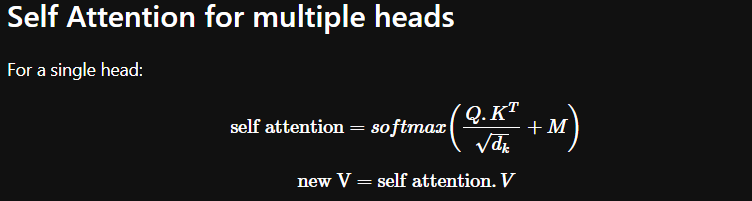

In [16]:
d_k=q.size()[-1]
scaled = torch.matmul(q,k.transpose(-2,-1))/math.sqrt(d_k)
scaled.shape

torch.Size([1, 8, 4, 4])

In [ ]:
k.T.shape

<ipython-input-18-879c2705464e>:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3637.)
  k.T.shape


torch.Size([64, 4, 8, 1])

In [ ]:
y = torch.randn(2, 3)
torch.transpose(y, 0, 1)

tensor([[ 0.1768, -0.4750],
        [ 0.7276, -0.9241],
        [-0.8291, -0.6627]])

In [ ]:
torch.transpose(y, 1, 0)

tensor([[ 0.1768, -0.4750],
        [ 0.7276, -0.9241],
        [-0.8291, -0.6627]])

In [ ]:
k.transpose(-1, -2) == k.transpose(-2, -1)

tensor([[[[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True],
          ...,
          [True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]],

         [[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True],
          ...,
          [True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]],

         [[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True],
          ...,
          [True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]],

         ...,

         [[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True],
          ...,
          [True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]],

         [[True, True, True, True],
          [True, 

In [ ]:
k.transpose(-1, -2).shape


torch.Size([1, 8, 64, 4])

In [ ]:
mask=torch.full(scaled.size(),float('-inf'))
mask=torch.triu(mask,diagonal=1)
mask[0][1]

tensor([[0., -inf, -inf, -inf],
        [0., 0., -inf, -inf],
        [0., 0., 0., -inf],
        [0., 0., 0., 0.]])

In [ ]:
(scaled + mask )[0][0]

tensor([[ 0.3423,    -inf,    -inf,    -inf],
        [ 0.2427,  0.0563,    -inf,    -inf],
        [-0.3354, -0.0878, -0.0412,    -inf],
        [ 0.2298, -0.4192, -0.2047,  0.0580]], grad_fn=<SelectBackward0>)

In [ ]:
scaled += mask

In [ ]:
np.exp(0.5596) / (np.exp(0.5596) + np.exp(0.0404))

0.6269606805367254

In [ ]:
attention = F.softmax(scaled, dim=-1)

In [ ]:
attention.shape


torch.Size([1, 8, 4, 4])

In [ ]:
attention[0][0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000],
        [0.5465, 0.4535, 0.0000, 0.0000],
        [0.2760, 0.3536, 0.3704, 0.0000],
        [0.3320, 0.1735, 0.2150, 0.2796]], grad_fn=<SelectBackward0>)

In [ ]:
values = torch.matmul(attention, v)
values.shape

torch.Size([1, 8, 4, 64])